<a href="https://colab.research.google.com/github/SakshamRimal/Deep-Learning/blob/main/05_CNN/AIDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denvermagtibay/ai-generated-essays-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ai-generated-essays-dataset


In [47]:
import os
import os

dataset_path = "/root/.cache/kagglehub/datasets/denvermagtibay/ai-generated-essays-dataset/versions/1"

# List the files in the dataset directory
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/denvermagtibay/ai-generated-essays-dataset/versions/1/AI Generated Essays Dataset.csv


In [48]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization

In [6]:
import pandas as pd

df = pd.read_csv(os.path.join(dataset_path, "AI Generated Essays Dataset.csv"))

display(df.head())

,text,generated
0,"Machine learning, a subset of artificial intel...",1
1,"A decision tree, a prominent machine learning ...",1
2,"Education, a cornerstone of societal progress,...",1
3,"Computers, the backbone of modern technology, ...",1
4,"Chess, a timeless game of strategy and intelle...",1


In [49]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import os

sentence_transformer_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = sentence_transformer_model.encode(df_with_text['text'].tolist())

In [50]:
embeddings


array([[-0.00825098, -0.0100305 ,  0.01462899, ..., -0.02833236,
        -0.01385279, -0.03221554],
       [ 0.02032849,  0.0176    ,  0.03439332, ..., -0.08234229,
         0.01493381,  0.05460954],
       [-0.00166637,  0.05136299,  0.0022083 , ..., -0.06077538,
        -0.00391586,  0.0056005 ],
       ...,
       [-0.03399416,  0.06704716,  0.11382968, ..., -0.00388146,
         0.01135673,  0.05571928],
       [-0.00521581,  0.10796802,  0.10718698, ..., -0.03494054,
        -0.02204762,  0.06158807],
       [ 0.03396352,  0.02560861,  0.14201318, ...,  0.05403692,
         0.03285314,  0.08118758]], dtype=float32)

In [51]:
embeddings[0]

array([-8.25098343e-03, -1.00304997e-02,  1.46289915e-02,  3.80473733e-02,
        7.48801678e-02,  1.35928264e-03, -1.43403164e-03, -6.74780905e-02,
       -3.68227735e-02, -1.58599054e-03, -1.40772099e-02,  1.13292430e-02,
        1.22696999e-02, -4.70553674e-02, -2.32575554e-02,  2.26578526e-02,
       -1.82752572e-02, -4.09168862e-02, -1.12092972e-01, -1.18457176e-01,
        1.47001529e-02, -5.25389425e-02, -1.24853421e-02,  2.60857772e-02,
        4.98437397e-02,  2.21955851e-02,  1.01595916e-01, -1.33299304e-03,
       -5.44084944e-02, -4.50800769e-02,  5.50415143e-02, -7.33000264e-02,
        3.92891616e-02, -4.20019031e-02, -2.42126752e-02, -1.79914851e-02,
       -1.07343961e-02,  4.24680067e-03,  3.27113681e-02, -2.10762098e-02,
        1.03081763e-02, -1.00534417e-01, -2.13689860e-02,  1.93497241e-02,
        1.08139843e-01,  1.22646235e-01, -1.96526106e-02, -4.99600507e-02,
       -3.65848541e-02, -2.90525109e-02, -9.13265869e-02, -8.60178843e-02,
       -1.08132744e-02, -

In [54]:
# join the embedding into the original dataset
df["embeddings"] = embeddings.tolist()


In [56]:
df

,generated,embeddings
0,1,"[-0.00825098343193531, -0.010030499659478664, ..."
1,1,"[0.020328493788838387, 0.01759999990463257, 0...."
2,1,"[-0.001666372176259756, 0.051362987607717514, ..."
3,1,"[-0.02390572428703308, -0.0030435360968112946,..."
4,1,"[0.08778113126754761, 0.06957029551267624, -0...."
...,...,...
1455,0,"[-0.008986816741526127, -0.034015953540802, 0...."
1456,0,"[-0.0020582620054483414, 0.06419064104557037, ..."
1457,0,"[-0.0339941643178463, 0.06704715639352798, 0.1..."
1458,0,"[-0.005215812940150499, 0.10796801745891571, 0..."


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   generated   1460 non-null   int64 
 1   embeddings  1460 non-null   object
dtypes: int64(1), object(1)
memory usage: 22.9+ KB


In [58]:
from sklearn.model_selection import train_test_split
import numpy as np

# Convert the 'embeddings' column to a NumPy array
X = np.array(df['embeddings'].tolist())
y = df['generated']

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=42)

In [59]:
model = Sequential()
# Add a Flatten layer to convert the 1D embeddings into a flat vector
model.add(Flatten(input_shape=(X_train.shape[1],)))
# Add Dense layers for processing the embeddings
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Add the output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [61]:
history = model.fit(X_train , y_train , epochs=10 , validation_data = (X_test, y_test) )

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.5195 - loss: 0.9157 - val_accuracy: 0.4932 - val_loss: 0.6892
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6594 - loss: 0.6246 - val_accuracy: 0.0685 - val_loss: 0.7313
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7726 - loss: 0.4843 - val_accuracy: 0.2568 - val_loss: 0.6955
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8553 - loss: 0.3368 - val_accuracy: 0.8390 - val_loss: 0.6445
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8847 - loss: 0.2884 - val_accuracy: 0.9897 - val_loss: 0.5752
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9229 - loss: 0.2410 - val_accuracy: 0.9966 - val_loss: 0.4733
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9522 - loss: 0.1820 - val_accuracy: 0.9966 - val_loss: 0.3933
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9580 - loss: 0.1525 - val_accuracy: 0.9966 - val_loss

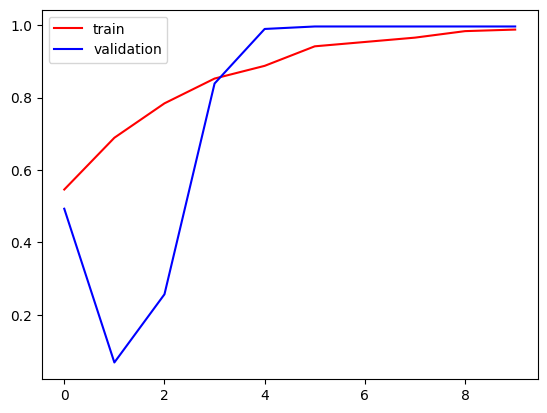

In [63]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , color='red' , label='train')
plt.plot(history.history['val_accuracy'] , color='blue' , label='validation')
plt.legend()
plt.show()

Based on the plot of training and validation accuracy, the model appears to be **overfitting**. The training accuracy continues to increase, while the validation accuracy has plateaued. This indicates that the model is learning the training data too well and not generalizing effectively to unseen data.

Common techniques to address overfitting include:
- Increasing dropout rates
- Adding L1 or L2 regularization
- Reducing model complexity
- Using early stopping
- Obtaining more training data

In [67]:

def predict_ai_generated(text):
    text_embedding = sentence_transformer_model.encode(text)
    text_embedding = np.expand_dims(text_embedding, axis=0)
    prediction = model.predict(text_embedding)
    return prediction[0][0]

new_text = "Machine learning, a subset of artificial intelligence, has rapidly emerged as a transformative force..."
prediction_probability = predict_ai_generated(new_text)

print(f"The predicted probability of the text being AI-generated is: {prediction_probability:.4f}")

if prediction_probability > 0.5:
    print("This text is likely AI-generated.")
else:
    print("This text is likely human-written.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The predicted probability of the text being AI-generated is: 0.9983
This text is likely AI-generated.
